$$\Huge{\textbf{Введение}}$$

Библиотека **wfdb** используется для чтения, записи, обработки и построения графиков физиологических сигналов. Репозиторий можно найти $\href{https://github.com/MIT-LCP/wfdb-python}{по \ ссылке}$. Для установки библиотеки необходимо прописать:

In [1]:
!pip install wfdb
import wfdb #импортируем успешно установленную библиотеку

Для демонстрации основных возможностей wfdb, потребуются образцы физиологических сигналов. Датасет можно найти в $\href{https://github.com/MIT-LCP/wfdb-python/tree/main/sample-data}{репозитории}$ (или вовсе не скачивать локально), но я буду использовать датасет "MIT-BIH Arrhythmia Dataset", который можно загрузить локально, запустив терминале следующий код:

In [2]:
'''wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/'''

'wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/'

$$\Huge{\textbf{Чтение и построение графиков сигналов}}$$

Импортируем несколько дополнительных библиотек:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import clear_output
plt.rcParams["figure.figsize"] = (12,8)

Самое первое, что обычно необходимо сделать — представить сигнал в виде интерпретируемого объекта ```wfdb.Record```. Для этого используется функция ```rdrecord``` (**ВАЖНО**: указывать расширение файла не нужно):

In [4]:
record = wfdb.rdrecord('mit-bih-arrhythmia-database-1.0.0/100')
display(record.__dict__) #эта информация называется header

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

Заметим, что при таком вызове функция ищет файл на чтение локально. Поддерживается также и чтение непосредственно с PhysioNet (база данных физиологических сигналов). Для чтения файла с PhysioNet необходимо использовать параметр ```pn_dir```, прописав в него путь файла. Например, для чтения файла '100', находящемуся по пути http://physionet.org/content/mitdb, необходимо написать такой код:

In [5]:
record = wfdb.rdrecord('100', pn_dir='mitdb')

На самом деле, мы прочитали один и тот же файл двумя разными способами, поэтому и не заводили две разных переменных.

Если по какой-то причине нас интересует только header, то можно воспользоваться ```wfdb.rdheader```:

In [6]:
record_header = wfdb.rdheader('100', pn_dir='mitdb')
display(record_header.__dict__)
#разумеется, rdheader поддерживает и локальное чтение

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

Объект ```wfdb.Record``` можно представить в виде графика при помощи функции ```plot_wfdb```:

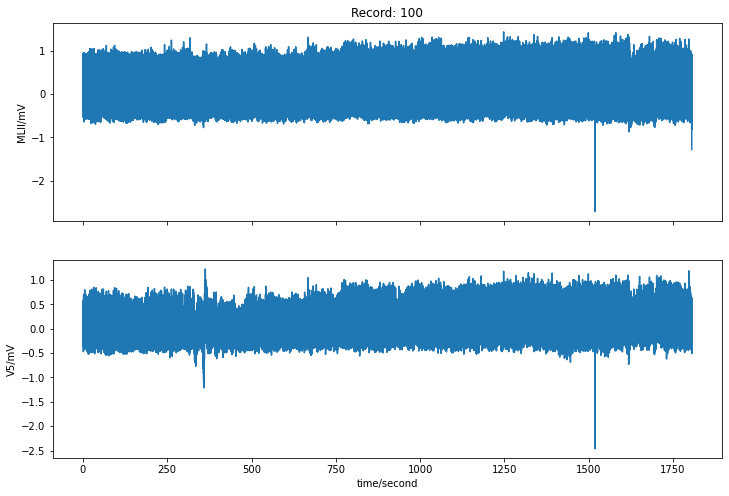

In [7]:
wfdb.plot_wfdb(record)

В функции ```plot_wfdb``` предусмотрен параметр ```return_fig```, позволяющий вернуть объект ```matplotlib.pyplot.figure```:

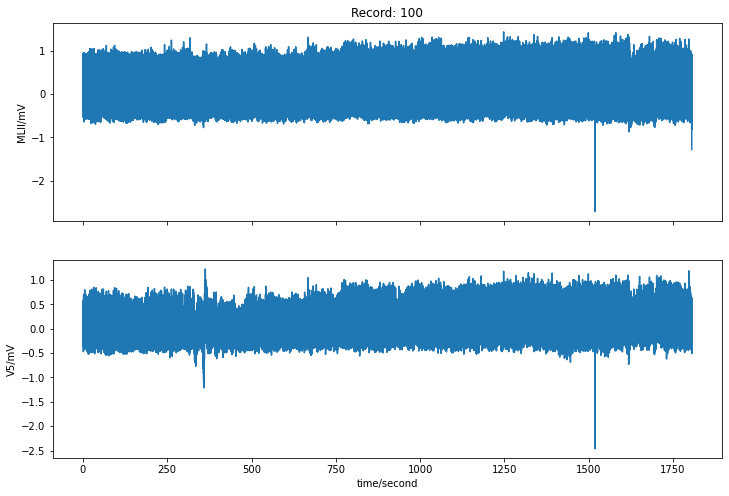

In [8]:
ax = wfdb.plot_wfdb(record, return_fig=True) #переменная ax имеет тип figure

Встроенная в функцию кастомизация графика довольно базовая (можно изменить подписи и ось X), поэтому для продвинутой кастомизации необходимо использование параметра выше. Далее уже можно работать с переменной ```ax```:

In [9]:
ax.__getstate__()

{'_stale': True,
 'stale_callback': None,
 'figure': None,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 'callbacks': <matplotlib.cbook.CallbackRegistry at 0x1b40a835cd0>,
 'bbox_inches': Bbox([[0.0, 0.0], [12.0, 8.0]]),
 'dpi_scale_trans': <matplotlib.transforms.Affine2D at 0x1b40a32b6a0>,
 '_dpi': 72.0,
 'bbox': <matplotlib.transforms.TransformedBbox at 0x1b40a32b2e0>,
 'transFigure': <matplotlib.transforms.BboxTransformTo at 0x1b40a32b760>,
 'patch': <matplotlib.patches.Rectangle at 0x1b40a32b730>,
 '_suptitle': None,
 'subplotpars'

Выше мы пользовались функцией ```rdrecord``` для чтения файла. Но полученный объект содержит очень много информации (собственно, всю), которая нам не всегда нужна. Для получения основной информации о WFDB файле используется функция ```rdsamp```. Она работает аналогично ```rdrecord```, но возвращает не объект ```wfdb.Record```, а numpy array и словарь:

In [10]:
signals, fields = wfdb.rdsamp('mit-bih-arrhythmia-database-1.0.0/100', channels=[1, 0], sampfrom=100, sampto=15000)

signals, fields = wfdb.rdsamp('100', channels=[1, 0], sampfrom=100, sampto=15000, pn_dir='mitdb') #без локального скачивания

In [11]:
display(signals)

array([[-0.195, -0.33 ],
       [-0.185, -0.335],
       [-0.185, -0.33 ],
       ...,
       [-0.275, -0.52 ],
       [-0.315, -0.54 ],
       [-0.31 , -0.545]])

In [12]:
display(fields)

{'fs': 360,
 'sig_len': 14900,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['V5', 'MLII'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

Нам может быть интересна аннотация, при помощи функции ```rdann``` её можно представить в виде объекта ```wfdb.Annotation``` и построить график:

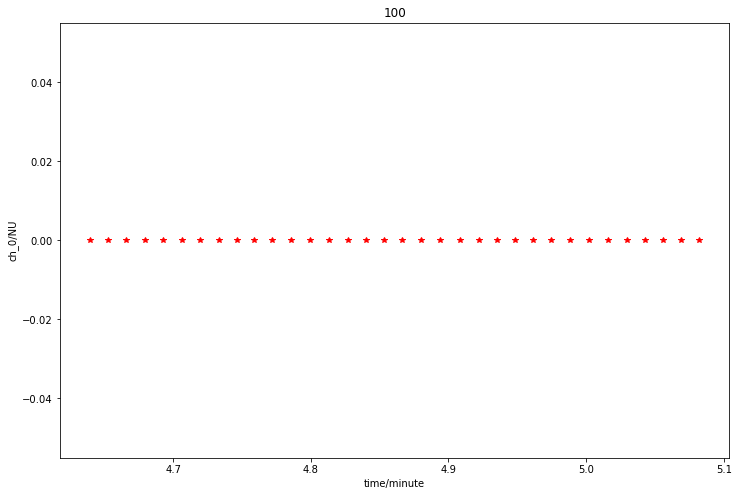

In [13]:
annotation = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pn_dir='mitdb')
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')
#разумеется, rdann поддерживает и локальное чтение

Наконец, если нас интересует вообще вся доступная информация (в частности, её визуальное представление), мы можем построить график и записи, и аннотации (в примере ниже приведён только некоторый отрезок всего сигнала):

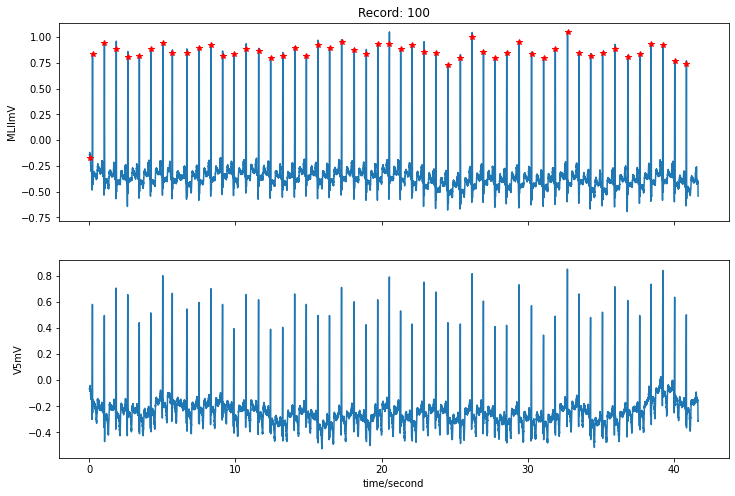

In [14]:
record = wfdb.rdrecord('100', sampto = 15000, pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', sampto = 15000, pn_dir='mitdb')

wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds') #аннотация построена на 0 канале

Если есть необходимость построить графики всех сигналов в папке, то можно воспользоваться функцией ```plot_all_records(directory='')```:

In [15]:
'''
wfdb.plot_all_records(directory='mit-bih-arrhythmia-database-1.0.0')
из соображений здравого смысла, запускать этот код я не буду
построение графиков можно прекратить нажатием клавиши enter
'''
clear_output()

Для копирования сигналов предусмотрен метод ```wrsamp()```, чуть подробнее о нём в следующем разделе:

In [16]:
record = wfdb.rdrecord('mit-bih-arrhythmia-database-1.0.0/100', physical=False)
#physical=False для того, чтобы не подавать d_signal в wrsamp()
record.wrsamp()

$$\Huge{\textbf{Запись сигналов}}$$

На самом деле, метод ```wrsamp``` предназначен в первую очередь для записи сигналов (в сущности для создания синтетических данных или для ручного редактирования некоторых полей реальных данных):

In [17]:
signals, fields = wfdb.rdsamp('100', channels=[1, 0], sampfrom=100, sampto=1500, pn_dir='mitdb')
#читаем сигнал

wfdb.wrsamp('synthetic_record', fs=250, units=['mV', 'mV'], sig_name=['I', 'II'], p_signal=signals, fmt=['16', '16'])
#синтетические данные (редактировали некоторые поля реальных данных)

og_record = wfdb.rdrecord('100', channels=[1, 0], sampfrom=100, sampto=1500, pn_dir='mitdb') #реальные данные
synthetic_record = wfdb.rdrecord('synthetic_record') #синтетические данные

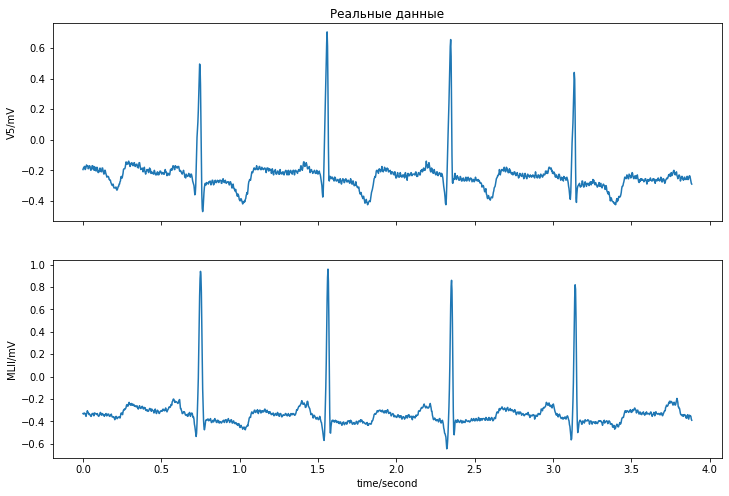

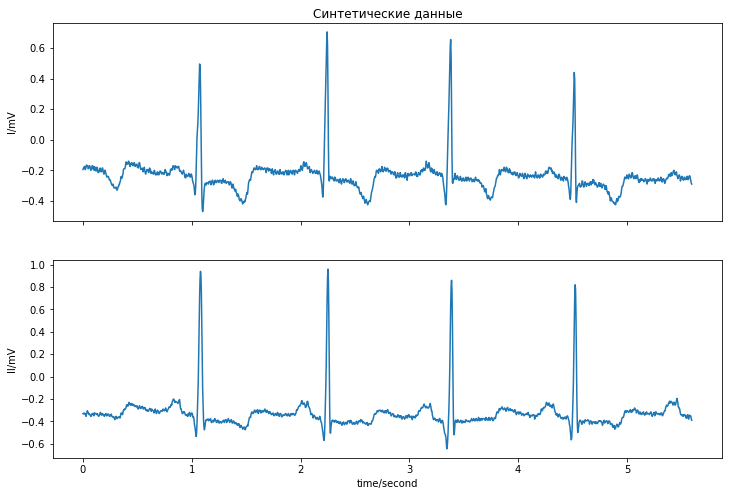

In [18]:
wfdb.plot_wfdb(og_record, title='Реальные данные')
wfdb.plot_wfdb(synthetic_record, title='Синтетические данные')